In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("./train.csv")
submit_x = pd.read_csv("./test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS --> 범주형 변수 object
NObeyesdad --> target 범주형 변수 object

SyntaxError: invalid syntax (307484773.py, line 1)

In [6]:
train_df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
train_df.corr()

/tmp/ipykernel_1125/1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


In [10]:
df_copy = train_df.copy()

train_x = train_df.drop(labels="NObeyesdad",axis=1)
train_y = train_df["NObeyesdad"]

In [11]:
#Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS
#매핑 필요 or LabelEncoder
from sklearn.preprocessing import LabelEncoder

convert_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for column in convert_list:
    le = LabelEncoder()
    train_x[column] = le.fit_transform(train_x[column])
    submit_x[column] = le.fit_transform(submit_x[column])

print(train_x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [12]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

#표준화 작업 수
ss = StandardScaler()
ss.fit(train_x)
train_scaled = ss.transform(train_x)
test_scaled = ss.transform(test_x)
submit_scaled = ss.transform(submit_x)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=10000) #max_iter: 모델 학습 시 최대 반복 횟수, C: 규제 강도(작을수록 규제 강함)
#기본적으로 L2 규제(Ridge) 사용
lr.fit(train_scaled, train_y)

print(f"train accuracy: {lr.score(train_scaled, train_y)}")#train data accuracy 측정
print(f"test accuracy: {lr.score(test_scaled, test_y)}") #test data accuracy 측정

train accuracy: 0.8635020554984584
test accuracy: 0.8658959537572254


In [15]:
lr.predict(test_scaled)

array(['Obesity_Type_III', 'Overweight_Level_I', 'Obesity_Type_I', ...,
       'Overweight_Level_I', 'Overweight_Level_II', 'Overweight_Level_II'],
      dtype=object)

In [10]:
submit_x

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,2,0,1.000000,0,0.807076,0.778632,2,3
13836,34594,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,2,0,2.000000,0,0.000000,0.000000,2,3
13837,34595,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,1,0,2.000000,0,1.949840,1.000000,2,3
13838,34596,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,2,0,2.000000,0,3.000000,2.000000,3,3


In [18]:
submit_predict = lr.predict(submit_scaled)
submit_predict

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [19]:
submit_data = {}
submit_data["id"] = [i+20758 for i in range(len(submit_predict))]
submit_data["NObeyesdad"] = submit_predict

In [20]:
import csv

# Write submit_data to a CSV file
with open("./submit_logistic.csv", "w", newline='') as file:
    writer = csv.DictWriter(file, fieldnames=submit_data.keys())
    writer.writeheader()
    # Convert submit_data to list of dictionaries and write rows
    for i in range(len(submit_predict)):
        row = {key: value[i] for key, value in submit_data.items()}
        writer.writerow(row)

In [21]:
a = pd.read_csv("./submit_logistic.csv")
a

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [26]:
train_y.shape

(15568,)

In [36]:
train_scaled.shape

(15568, 17)

In [26]:
from tensorflow.keras.utils import to_categorical

# 문자열 레이블을 정수로 인코딩
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)

# 고유 클래스 수 확인
num_classes = len(np.unique(train_y_encoded))
print(f"Number of classes: {num_classes}")

# 레이블 데이터의 원-핫 인코딩
train_y_one_hot = to_categorical(train_y_encoded, num_classes)
print(f"Shape of one-hot encoded labels: {train_y_one_hot.shape}")

2024-07-20 15:34:09.728144: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-20 15:34:10.060943: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-20 15:34:10.886017: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Number of classes: 7
Shape of one-hot encoded labels: (15568, 7)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim = train_scaled.shape[1]

#클래스의 수
output_dim = len(np.unique(train_y))

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
#    Dense(64, activation='relu'),
    Dense(output_dim, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-20 15:34:11.729204: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-20 15:34:11.729406: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
#compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(train_scaled, train_y_one_hot, epochs=50, validation_split=0.2)

Epoch 1/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.5545 - loss: 1.2572 - val_accuracy: 0.7421 - val_loss: 0.6961
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.7584 - loss: 0.6492 - val_accuracy: 0.7983 - val_loss: 0.5311
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.8177 - loss: 0.5038 - val_accuracy: 0.8349 - val_loss: 0.4538
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.8392 - loss: 0.4426 - val_accuracy: 0.8414 - val_loss: 0.4162
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8601 - loss: 0.3962 - val_accuracy: 0.8561 - val_loss: 0.3893
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8687 - loss: 0.3736 - val_accuracy: 0.8606 - val_loss: 0.3818
Epoch 7/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8662 - loss: 0.3818 - val_accuracy: 0.8577 - val_loss: 0.3682
Epoch 8/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8687 - loss: 0.3727 - 

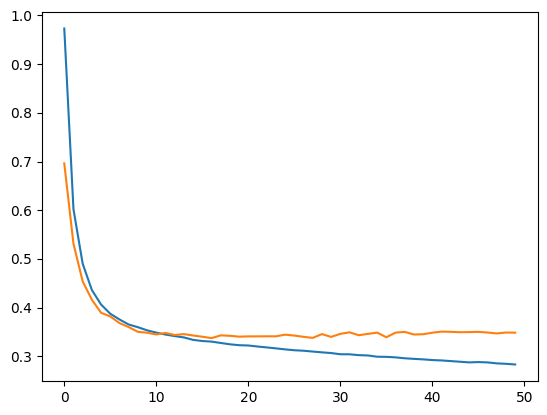

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [31]:
# 예측 수행
predictions = model.predict(train_scaled)
print(predictions)

# 각 샘플에 대해 가장 높은 확률을 가진 클래스 선택
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

classes = np.unique(train_y)
result = classes[predicted_classes]

487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
[[1.2216292e-06 8.8373381e-01 3.4561665e-05 ... 7.4643875e-05
  1.1364446e-01 2.5112922e-03]
 [1.3597749e-04 2.9773368e-03 1.9067591e-02 ... 8.2790389e-14
  5.5708442e-02 9.2123324e-01]
 [5.1631044e-10 2.9354164e-06 8.8362932e-01 ... 1.2203511e-05
  6.3434551e-03 1.0993832e-01]
 ...
 [3.1044630e-05 2.8423592e-01 2.6195019e-04 ... 4.9553753e-05
  6.7911905e-01 3.6300369e-02]
 [5.5062098e-17 2.9207155e-16 1.0924503e-03 ... 9.9890018e-01
  1.0427574e-07 4.0488608e-06]
 [2.4000695e-09 5.2305122e-11 9.4422954e-01 ... 2.7814616e-07
  5.0696879e-05 5.7158177e-03]]
[1 6 2 ... 5 4 2]


In [32]:
score = 0
for i in range(len(train_y)):
    if list(train_y)[i] == result[i]:
        score += 1
        
train_accuracy = score / len(train_y)

In [33]:
# 예측 수행
predictions = model.predict(test_scaled)
print(predictions)

# 각 샘플에 대해 가장 높은 확률을 가진 클래스 선택
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

classes = np.unique(train_y)
result = classes[predicted_classes]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
[[4.34779431e-17 6.49039313e-16 1.10468565e-04 ... 9.99885798e-01
  1.28154438e-08 6.16863588e-07]
 [6.44726424e-06 7.67052546e-02 1.59987994e-03 ... 1.39260692e-06
  5.81411541e-01 3.40270936e-01]
 [2.07544332e-07 5.60592598e-05 8.77114773e-01 ... 1.10039441e-03
  1.97764933e-02 1.01951450e-01]
 ...
 [1.71161664e-04 7.53506040e-03 1.06288306e-02 ... 7.32281069e-06
  4.42075014e-01 5.38866162e-01]
 [8.89671924e-07 1.96874863e-03 7.36246305e-03 ... 7.55205917e-07
  1.29264537e-02 9.77712035e-01]
 [1.91972184e-04 2.17534034e-04 5.72917275e-02 ... 7.97818359e-07
  4.86546718e-02 8.91516626e-01]]
[4 5 2 ... 6 6 6]


In [34]:
score = 0
for i in range(len(test_y)):
    if list(test_y)[i] == result[i]:
        score += 1
        
test_accuracy = score / len(test_y)

In [35]:
print(f"train accuracy: {train_accuracy}" )
print(f"test accuracy: {test_accuracy}" )

train accuracy: 0.8992805755395683
test accuracy: 0.8703275529865125


In [37]:
model.predict(submit_scaled)

433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


array([[5.5818259e-18, 1.2662519e-16, 2.7349084e-03, ..., 8.4912699e-06,
        2.9401154e-10, 2.5519041e-06],
       [6.2477826e-05, 5.4652137e-03, 1.3250080e-01, ..., 1.0235310e-04,
        7.0498520e-01, 1.5688284e-01],
       [2.6431165e-15, 1.9745244e-14, 2.1510741e-01, ..., 7.8220135e-01,
        5.3036548e-08, 2.3027947e-05],
       ...,
       [7.2816712e-01, 2.7116284e-01, 3.3294856e-11, ..., 2.1220062e-06,
        6.6622632e-04, 1.7251984e-06],
       [1.9558600e-01, 7.6668423e-01, 3.7203499e-08, ..., 1.0185071e-10,
        2.5232609e-02, 1.2497139e-02],
       [1.5793918e-18, 3.7490280e-17, 4.6396803e-04, ..., 1.1852047e-06,
        4.1150090e-11, 1.5442365e-06]], dtype=float32)

In [38]:
import csv

predictions = model.predict(submit_scaled)
predicted_classes = np.argmax(predictions, axis=1)
submit_predict = classes[predicted_classes]


submit_data = {}
submit_data["id"] = [i+20758 for i in range(len(submit_predict))]
submit_data["NObeyesdad"] = submit_predict

# Write submit_data to a CSV file
with open("./submit_Neural.csv", "w", newline='') as file:
    writer = csv.DictWriter(file, fieldnames=submit_data.keys())
    writer.writeheader()
    # Convert submit_data to list of dictionaries and write rows
    for i in range(len(submit_predict)):
        row = {key: value[i] for key, value in submit_data.items()}
        writer.writerow(row)

433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(oob_score=True,n_jobs=-1, random_state=42)

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), #노드가 분할될 때 필요한 최소 불순물 감소량
          'max_depth': range(5,30,1),#트리의 최대 깊이 5 ~ 20의 정수값
          'min_samples_split': range(2,100,10)#내부 노드 분할하는 데 필요한 최소 샘플 
          }

grid = GridSearchCV(rf, params, n_jobs=-1, cv=5)
grid.fit(train_scaled, train_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 30),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [22]:
print(grid.score(train_scaled, train_y))
print(grid.score(test_scaled, test_y))

0.9554856115107914
0.894990366088632


In [24]:
submit_predict = grid.predict(submit_scaled)

In [25]:
import csv

submit_data = {}
submit_data["id"] = [i+20758 for i in range(len(submit_predict))]
submit_data["NObeyesdad"] = submit_predict

# Write submit_data to a CSV file
with open("./submit_randomforest.csv", "w", newline='') as file:
    writer = csv.DictWriter(file, fieldnames=submit_data.keys())
    writer.writeheader()
    # Convert submit_data to list of dictionaries and write rows
    for i in range(len(submit_predict)):
        row = {key: value[i] for key, value in submit_data.items()}
        writer.writerow(row)